In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing CSV file

In [ ]:
df = pd.read_csv('students_adaptability_level_online_education.csv')

In [ ]:
# look the dataset
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [ ]:
# Looking for no. of rows and column
df.shape

(1205, 14)

In [ ]:
# cheaking datatype of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [ ]:
#cheaking missing value

df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

#### Not any missing value

In [ ]:
#Describing the dataset

df.describe().T

#we transposed the dataframe for better view

,count,unique,top,freq
Gender,1205,2,Boy,663
Age,1205,6,21-25,374
Education Level,1205,3,School,530
Institution Type,1205,2,Non Government,823
IT Student,1205,2,No,901
Location,1205,2,Yes,935
Load-shedding,1205,2,Low,1004
Financial Condition,1205,3,Mid,878
Internet Type,1205,2,Mobile Data,695
Network Type,1205,3,4G,775


<AxesSubplot:ylabel='Adaptivity Level'>

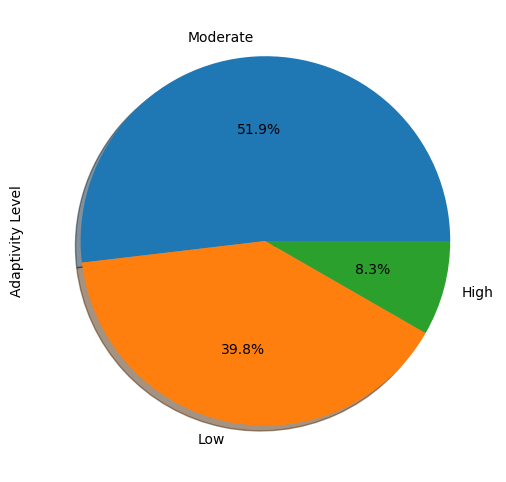

In [ ]:
# Pie chart show % adaptivity level in dataset

plt.figure(figsize=(8,6))
df['Adaptivity Level'].value_counts().plot.pie(autopct='%1.1f%%' ,shadow=True)


### The percentage Adaptivity Level in Dataset

#### Low = 39.8%
#### Moderate = 51.9%
#### High = 8.3 %

<AxesSubplot:ylabel='Device'>

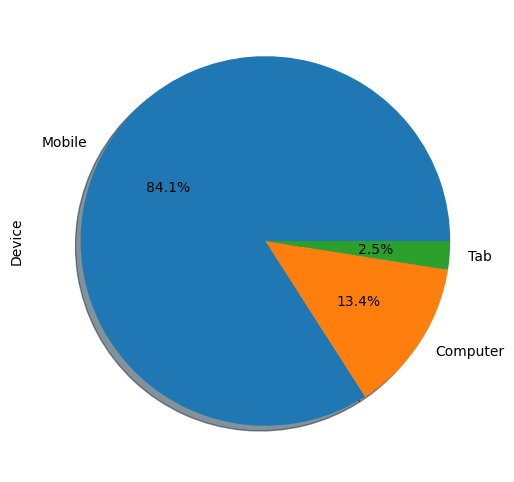

In [ ]:
# Show the Device using in Dataset

plt.figure( figsize=(8,6))

df['Device'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)

### The Device using in Dataset
#### Mobile = 84.1%
#### Computer = 13.4%
#### Tab = 2.5%

C:\Users\91930\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Institution Type', ylabel='count'>

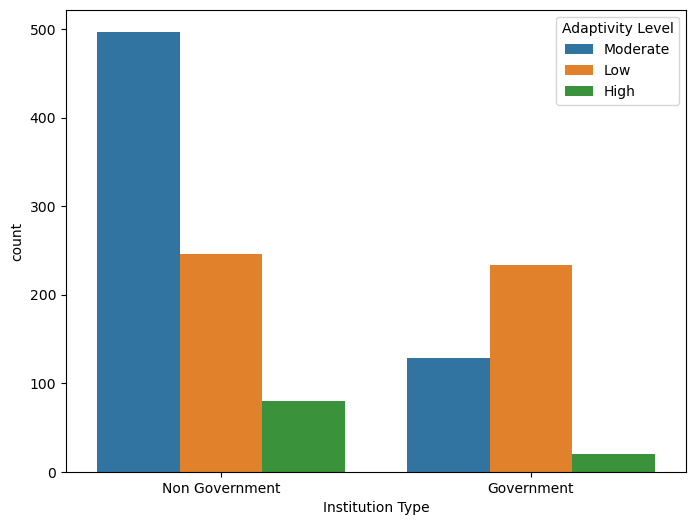

In [ ]:
# Show the effect Institution Type in Adaptivity Level using in Dataset

plt.figure(figsize=(8,6))


sns.countplot(df["Institution Type"],hue=df["Adaptivity Level"])

#### In general we can say that,
Affect on non Government - HIGH

Affect on Government - LOW


C:\Users\91930\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Financial Condition', ylabel='count'>

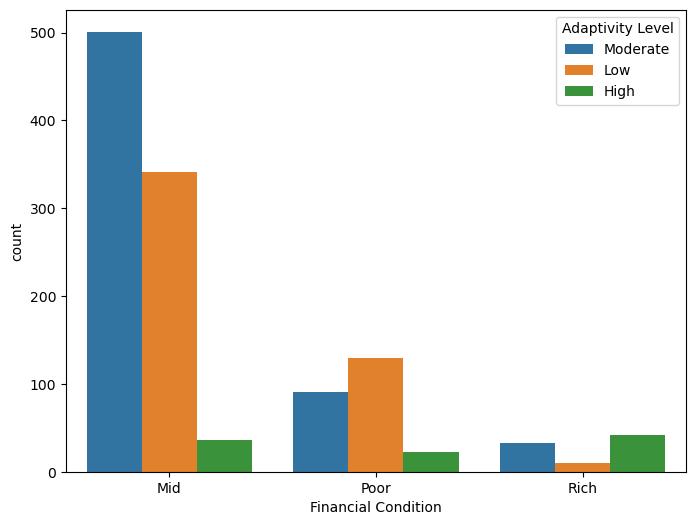

In [ ]:
#Show the effect Financial Condition in Adaptivity Level using in Dataset

plt.figure(figsize=(8,6))

sns.countplot(df["Financial Condition"],hue=df["Adaptivity Level"])

#### According to this data,

Middle Financial families Adaptivity - HIGH

Poor and Rich Financial families Adaptivity - LOW

C:\Users\91930\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

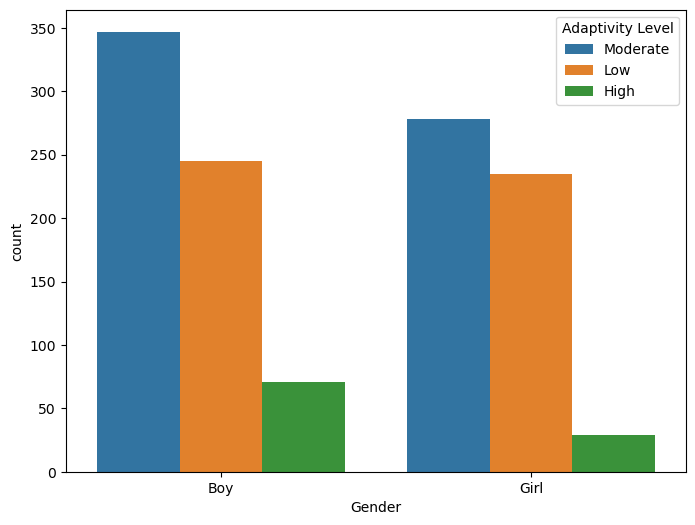

In [ ]:
# Show the effect Gender in Adaptivity Level using in Dataset

plt.figure(figsize=(8,6))

sns.countplot(df["Gender"],hue=df["Adaptivity Level"])

#### Not remarkable difference between the gender for Adaptivity Level

C:\Users\91930\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Network Type', ylabel='count'>

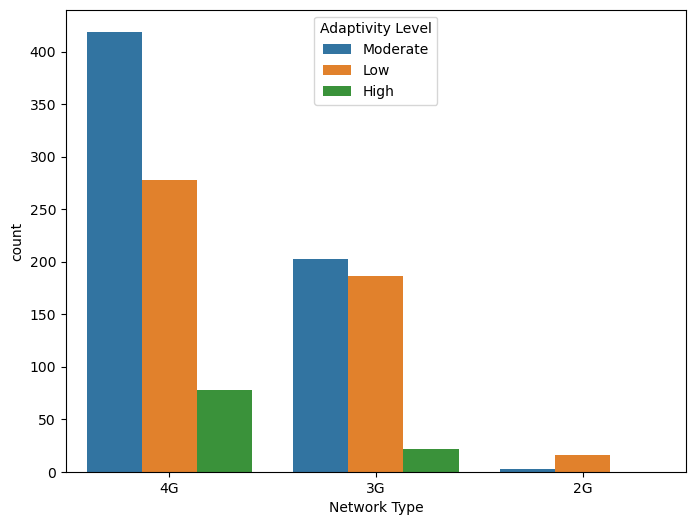

In [ ]:
# Show the effect Network Type in Adaptivity Level using in Dataset

plt.figure(figsize=(8,6))
sns.countplot(df["Network Type"],hue=df["Adaptivity Level"])

#### Most of the students using - 4G and its progress Highest
#### Than 3G and lowest 2G

### Building a Machine Learning Model And Predict

In [ ]:
#Importing the basic librarires for building model - classification

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


### We need change all data type using LabelEncode

In [ ]:
# change all data type using LabelEncode

data=df

label_encoders = {}
categorical_columns = data.columns  # I would recommend using columns names here if you're using pandas. If you're using numpy then stick with range(n) instead

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [ ]:
data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2
2,1,2,0,0,0,1,1,0,1,2,1,0,1,2
3,1,1,1,1,0,1,1,0,0,2,1,0,1,2
4,1,2,1,1,0,1,1,1,0,1,0,0,1,1


In [ ]:
#Defined X value and y value , and split the data train
X = df.drop(columns="Adaptivity Level")
y = df["Adaptivity Level"]   # y = quality

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (843, 13)
X Test  :  (362, 13)
Y Train :  (843,)
Y Test  :  (362,)


In [ ]:
#Train the machine learning algorithm

RFR = RandomForestClassifier()
RFR.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#Make predictions
y_pred = RFR.predict(X_test)

#Evaluate the accuracy
accuracy =accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9033149171270718


## So our RandomForestClassifier Model has 90.33% Accuracy